# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
params = pd.read_csv('from_db/plain_loss_l1_l2/params.csv')
train = pd.read_csv('from_db/plain_loss_l1_l2/train.csv')
test = pd.read_csv('from_db/plain_loss_l1_l2/test.csv')

# Params filter

In [3]:
params.columns

Index(['TYPE', 'time_seconds', 'run_uuid', 'name', 'experiment_name',
       'arc_dilation_resnet1d', 'arc_embedding_dim', 'arc_filters',
       'arc_kernel', 'arc_latent_dim', 'arc_num_layers', 'arc_rank',
       'arc_resnet_bottleneck_factor', 'batch', 'batch_size', 'cache_path',
       'command', 'd', 'device', 'exp', 'global_config', 'hyp_device',
       'hyp_embedding_dim', 'hyp_interaction_prior', 'hyp_lr',
       'hyp_negative_weight', 'hyp_output_th', 'hyp_scheduler',
       'hyp_lambda_l1', 'hyp_lambda_l2', 'j', 'max_epochs', 'max_len',
       'max_length', 'no_cache', 'nworkers', 'out_path', 'quiet', 'run',
       'train_file', 'valid_file', 'valid_split', 'verbose'],
      dtype='object')

In [4]:
params.drop(['arc_dilation_resnet1d', 'arc_embedding_dim', 'arc_filters',
       'arc_kernel', 'arc_latent_dim', 'arc_num_layers', 'arc_rank',
       'arc_resnet_bottleneck_factor', 'batch', 'batch_size', 'cache_path',
       'command', 'd', 'device', 'exp', 'hyp_device',
       'hyp_embedding_dim', 'hyp_interaction_prior', 'hyp_lr',
       'hyp_negative_weight',  'hyp_scheduler',
       'j', 'max_len', 'global_config', 'hyp_output_th', 'max_epochs', 'run', 
       'max_length', 'no_cache', 'nworkers', 'out_path', 'quiet', 'verbose'], axis=1, inplace=True)

In [5]:
params.sample(3)

,TYPE,time_seconds,run_uuid,name,experiment_name,hyp_lambda_l1,hyp_lambda_l2,train_file,valid_file,valid_split
25,test,27,1149cb68ea4b475fb20322050442904d,loss_l1_5e-3,plain_loss_fn,0.005,NaN,NaN,NaN,NaN
3,test,7,9a29bad7f77941d188c3abf5c24e56f8,fam_sim_fold_3,plain_kfold_100e,NaN,NaN,NaN,NaN,NaN
24,test,28,c1bbe51917ba482992add47ffbc5a3d1,loss_l1_5e-2,plain_loss_fn,0.050,NaN,NaN,NaN,NaN


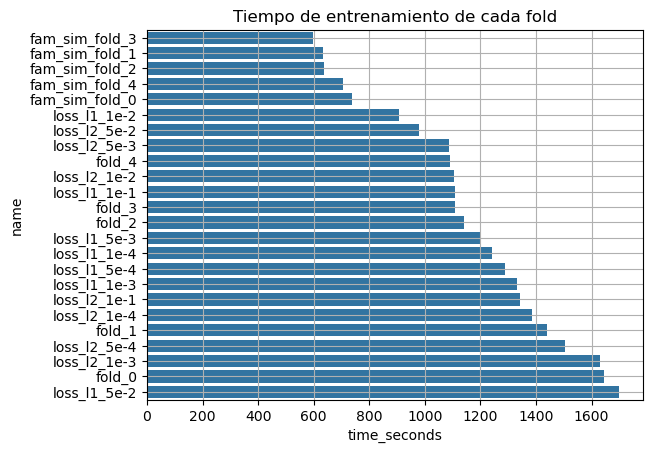

In [6]:
g = sns.barplot(data=params[params['TYPE']=='train'].sort_values(by=['time_seconds']), y='name', x='time_seconds')

g.set_title('Tiempo de entrenamiento de cada fold')
g.grid()

# KFold analysis

In [7]:
folds = train.query('name.str.contains("fold")', engine='python')
folds.loc[:, 'fold'] = folds['name'].str.split('_').str[-1]
folds.loc[:, 'name'] = folds['name'].str.split('_').str[:-1].str.join('_')
folds

/tmp/ipykernel_7789/1541930969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folds.loc[:, 'fold'] = folds['name'].str.split('_').str[-1]


,run_uuid,name,step,train_loss,train_Accuracy,train_F1,valid_loss,valid_Accuracy,valid_Accuracy_seq,valid_F1,fold
0,10b47712124f4e90843fb96a198c489b,fam_sim_fold,0,0.115965,0.851164,0.826214,0.118252,0.844159,0.000000,0.815310,0
1,10b47712124f4e90843fb96a198c489b,fam_sim_fold,1,0.088215,0.887655,0.876804,0.110796,0.854213,0.000000,0.832983,0
2,10b47712124f4e90843fb96a198c489b,fam_sim_fold,2,0.078827,0.900327,0.892743,0.107288,0.860122,0.000000,0.841268,0
3,10b47712124f4e90843fb96a198c489b,fam_sim_fold,3,0.073732,0.907437,0.900999,0.106972,0.860900,0.000000,0.843053,0
4,10b47712124f4e90843fb96a198c489b,fam_sim_fold,4,0.069763,0.913187,0.907903,0.106771,0.861368,0.000000,0.844719,0
...,...,...,...,...,...,...,...,...,...,...,...
740,2a2af0e4f5014e12837366cbb928deca,fold,95,0.027120,0.979069,0.978878,0.059545,0.933570,0.067073,0.931934,4
741,2a2af0e4f5014e12837366cbb928deca,fold,96,0.027176,0.978936,0.978752,0.059011,0.933606,0.048780,0.932083,4
742,2a2af0e4f5014e12837366cbb928deca,fold,97,0.026888,0.979327,0.979153,0.058909,0.933874,0.060976,0.932143,4
743,2a2af0e4f5014e12837366cbb928deca,fold,98,0.027025,0.979171,0.978985,0.059552,0.933058,0.045732,0.931652,4


<Axes: xlabel='step', ylabel='train_loss'>

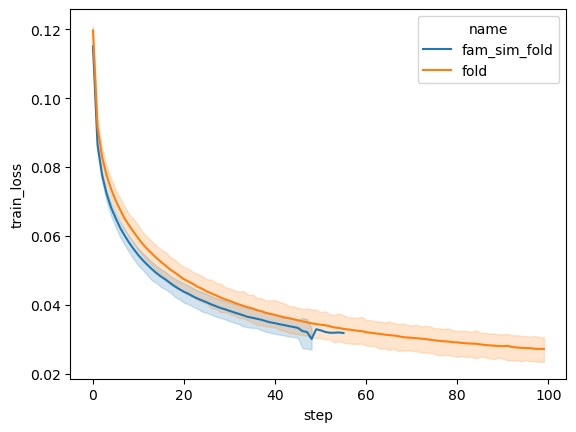

In [10]:
sns.lineplot(data=folds, x='step', y='train_loss', hue='name',  legend=True)

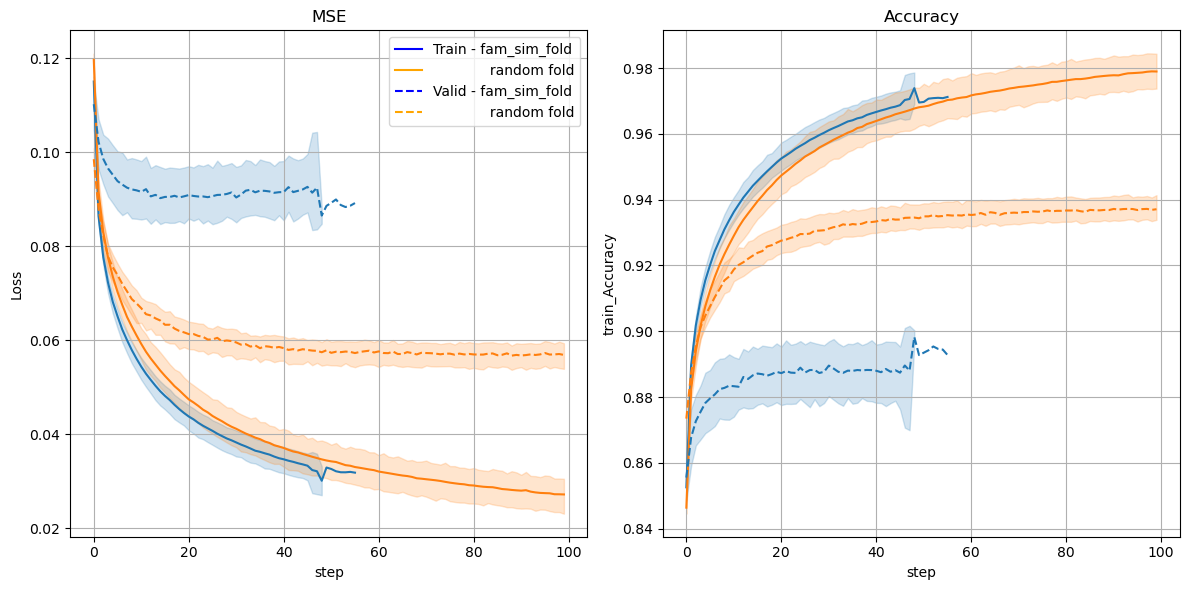

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
f = sns.lineplot(data=folds, x='step', y='train_loss', hue='name', ax=ax[0], legend=False)

g = sns.lineplot(data=folds, x='step', y='valid_loss', linestyle='--',hue='name', ax=ax[0], legend=False)
g.set_ylabel('Loss')
g.set_title('MSE')
g.grid()


# Custom legend for loss
ax[0].legend(
    handles=[
        plt.Line2D([0], [0], color='b', label='Train - fam_sim_fold'),
        plt.Line2D([0], [0], color='orange', label='             random fold'),
        plt.Line2D([0], [0], color='b', linestyle='--', label='Valid - fam_sim_fold'),
        plt.Line2D([0], [0], color='orange', linestyle='--', label='             random fold')
    ], 
    loc='best'
)

h = sns.lineplot(data=folds, x='step', y='train_Accuracy', hue='name', ax=ax[1], legend=False) 
j = sns.lineplot(data=folds, x='step', y='valid_Accuracy', linestyle='--', hue='name', ax=ax[1], legend=False) 
j.set_title('Accuracy')
j.grid()


fig.tight_layout()
plt.show()

In [47]:
folds_test = test.query('name.str.contains("fold")', engine='python')
folds_test.loc[:, 'fold'] = folds_test['name'].str.split('_').str[-1]
folds_test.loc[:, 'name'] = folds_test['name'].str.split('_').str[:-1].str.join('_')
folds_test

/tmp/ipykernel_225964/4096981424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folds_test.loc[:, 'fold'] = folds_test['name'].str.split('_').str[-1]


,run_uuid,name,test_loss,test_Accuracy,test_Accuracy_seq,test_F1,fold
0,a72a3b9a57b44c4abb8c68f9ab752cbf,fam_sim_fold,0.090647,0.889472,0.000000,0.883530,0
1,8a4c58759ea94cf081f4900b86cbf9f8,fam_sim_fold,0.091345,0.886714,0.000000,0.879843,1
2,f674f59ca930444691df68215a0de23c,fam_sim_fold,0.088123,0.891143,0.000000,0.884203,2
3,9a29bad7f77941d188c3abf5c24e56f8,fam_sim_fold,0.100031,0.871979,0.000000,0.857856,3
4,ad206b39ebd0495389f92aee64ec5f69,fam_sim_fold,0.094077,0.880697,0.000000,0.873577,4
5,a7df7b8a4b704657a05e53376b144905,fold,0.053010,0.941823,0.051724,0.940315,0
6,7094722745ad43eb852f07f42e5dafe5,fold,0.059685,0.931805,0.034483,0.929927,1
7,c54e88f04cdf4bdda290eeaa76d6ce08,fold,0.054674,0.939941,0.081897,0.938656,2
8,90fde2437539453fafb06a7c96215ff7,fold,0.057634,0.935362,0.047414,0.933540,3
9,1ad4b11e129e4f72be74c01386833e1d,fold,0.057715,0.935429,0.053879,0.933848,4


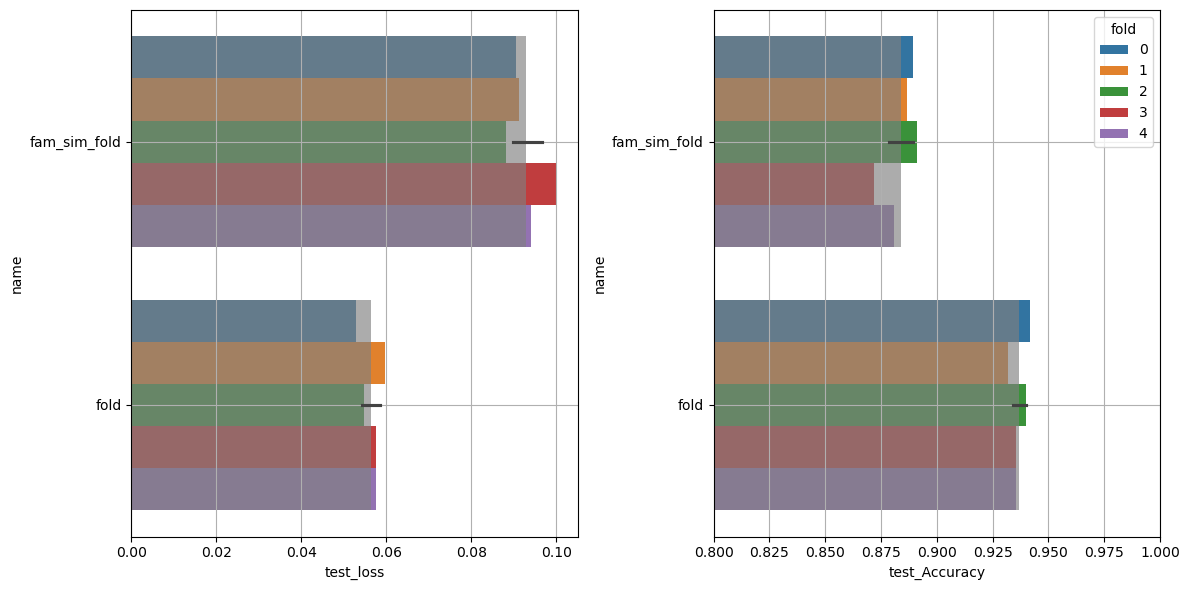

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=folds_test, y='name', x='test_loss',    hue='fold' , ax=ax[0], legend=False)
sns.barplot(data=folds_test, y='name', x='test_loss', alpha=0.65,  ax=ax[0], color='gray')
sns.barplot(data=folds_test, y='name', x='test_Accuracy',hue='fold' ,  ax=ax[1])
sns.barplot(data=folds_test, y='name', x='test_Accuracy', alpha=0.65, ax=ax[1], color='gray')
ax[1].set_xlim([0.8, 1])
ax[1].legend(title='fold')
for a in ax: a.grid('minor')
fig.tight_layout()


# Loss L1 / L2 Analysis

In [135]:
train_l1_l2 = train.query('name.str.contains("loss") or name =="fold_0"', engine='python')
train_l1_l2['loss'] = train_l1_l2['name'].str.split('_').str[1]
train_l1_l2['lambda'] = train_l1_l2['name'].str.split('_').str[-1].astype('float')
train_l1_l2

/tmp/ipykernel_225964/208498931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_l1_l2['loss'] = train_l1_l2['name'].str.split('_').str[1]
/tmp/ipykernel_225964/208498931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_l1_l2['lambda'] = train_l1_l2['name'].str.split('_').str[-1].astype('float')


,run_uuid,name,step,train_loss,train_Accuracy,train_F1,valid_loss,valid_Accuracy,valid_Accuracy_seq,valid_F1,loss,lambda
245,3291d4b3fd024226a73a66606448df31,fold_0,0,0.121182,0.844142,0.816380,0.099680,0.871659,0.000000,0.856652,0,0.0000
246,3291d4b3fd024226a73a66606448df31,fold_0,1,0.092555,0.881885,0.869767,0.089118,0.887350,0.000000,0.877544,0,0.0000
247,3291d4b3fd024226a73a66606448df31,fold_0,2,0.083428,0.894189,0.885390,0.083574,0.894019,0.000000,0.883556,0,0.0000
248,3291d4b3fd024226a73a66606448df31,fold_0,3,0.078505,0.900493,0.892891,0.079095,0.899349,0.006098,0.889963,0,0.0000
249,3291d4b3fd024226a73a66606448df31,fold_0,4,0.074448,0.906230,0.899920,0.077595,0.902749,0.000000,0.895750,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,7f842f6eb5a24f02b3a4b4c5f939d781,loss_l2_5e-4,95,0.081901,0.930704,0.928654,0.091593,0.917082,0.003049,0.913679,l2,0.0005
1778,7f842f6eb5a24f02b3a4b4c5f939d781,loss_l2_5e-4,96,0.082146,0.930071,0.928045,0.093569,0.914610,0.000000,0.911137,l2,0.0005
1779,7f842f6eb5a24f02b3a4b4c5f939d781,loss_l2_5e-4,97,0.081970,0.930462,0.928477,0.093172,0.916802,0.000000,0.912858,l2,0.0005
1780,7f842f6eb5a24f02b3a4b4c5f939d781,loss_l2_5e-4,98,0.081376,0.931138,0.929145,0.093635,0.916498,0.000000,0.912139,l2,0.0005


<Axes: xlabel='step', ylabel='valid_loss'>

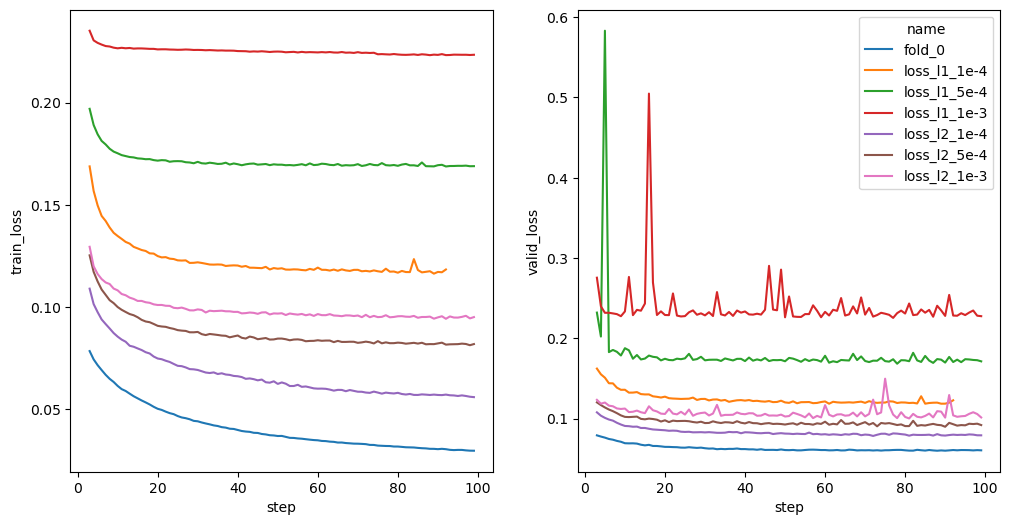

In [ ]:
df = train_l1_l2[(train_l1_l2['step']>2 )& (train_l1_l2['lambda'] < 0.002)].sort_values(by=['loss','lambda'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=df, x='step', y='train_loss', hue='name', ax=ax[0], legend=False)
sns.lineplot(data=df, x='step', y='valid_loss', hue='name', ax=ax[1])


<Axes: xlabel='step', ylabel='valid_Accuracy'>

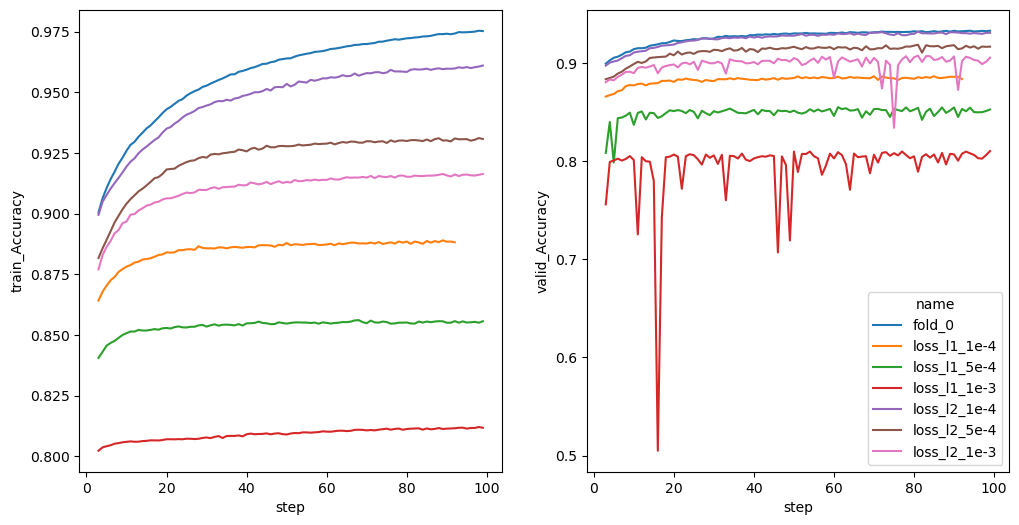

In [183]:
df = train_l1_l2[(train_l1_l2['step']>2 )& (train_l1_l2['lambda'] < 0.002)].sort_values(by=['loss','lambda'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=df, x='step', y='train_Accuracy', hue='name', ax=ax[0], legend=False)

sns.lineplot(data=df, x='step', y='valid_Accuracy', hue='name', ax=ax[1])

In [138]:
test_l1_l2 = test.query('name.str.contains("loss") or name =="fold_0"', engine='python')
test_l1_l2['loss'] = test_l1_l2['name'].str.split('_').str[1]
test_l1_l2['lambda'] = test_l1_l2['name'].str.split('_').str[-1].astype('float')
test_l1_l2

/tmp/ipykernel_225964/2409952333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_l1_l2['loss'] = test_l1_l2['name'].str.split('_').str[1]
/tmp/ipykernel_225964/2409952333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_l1_l2['lambda'] = test_l1_l2['name'].str.split('_').str[-1].astype('float')


,run_uuid,name,test_loss,test_Accuracy,test_Accuracy_seq,test_F1,loss,lambda
5,a7df7b8a4b704657a05e53376b144905,fold_0,0.053010,0.941823,0.051724,0.940315,0,0.0000
10,a0ef174463c944c28d525fbdb39d9a03,loss_l1_1e-1,7.095588,0.801169,0.000000,0.712861,l1,0.1000
11,047061eec0b34c2cb73bb0177f59ae13,loss_l1_1e-2,0.829796,0.801169,0.000000,0.712861,l1,0.0100
12,6ea49cbdb7e44be89b439e042564910c,loss_l1_1e-3,0.222995,0.812896,0.000000,0.750304,l1,0.0010
13,a5635f540023446ea270f5185b00fc47,loss_l1_1e-4,0.116144,0.889480,0.000000,0.878160,l1,0.0001
14,c1bbe51917ba482992add47ffbc5a3d1,loss_l1_5e-2,3.610284,0.801169,0.000000,0.712861,l1,0.0500
15,1149cb68ea4b475fb20322050442904d,loss_l1_5e-3,0.491629,0.801169,0.000000,0.712861,l1,0.0050
16,04c0c70acd7b4d32857e12623d00970b,loss_l1_5e-4,0.167076,0.855991,0.000000,0.829487,l1,0.0005
17,a5d9d929cf61414cbe67f9a128f38724,loss_l2_1e-1,0.165226,0.801169,0.000000,0.712861,l2,0.1000
18,6ed1f4e7975b409a9a302fb5e1116bf8,loss_l2_1e-2,0.160235,0.801169,0.000000,0.712861,l2,0.0100


<Axes: xlabel='test_Accuracy', ylabel='loss'>

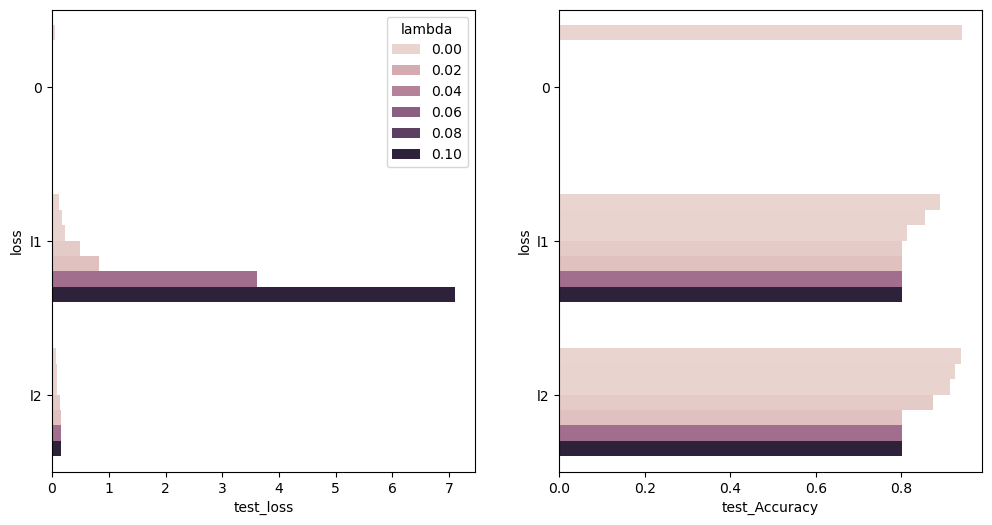

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=test_l1_l2, y='loss', x='test_loss',    hue='lambda' , ax=ax[0]) 
sns.barplot(data=test_l1_l2, y='loss', x='test_Accuracy',    hue='lambda' ,  ax=ax[1], legend=False) 

In [176]:
test_l1_l2[test_l1_l2['loss'] == '0']['test_loss'].item()

0.0530096732465357

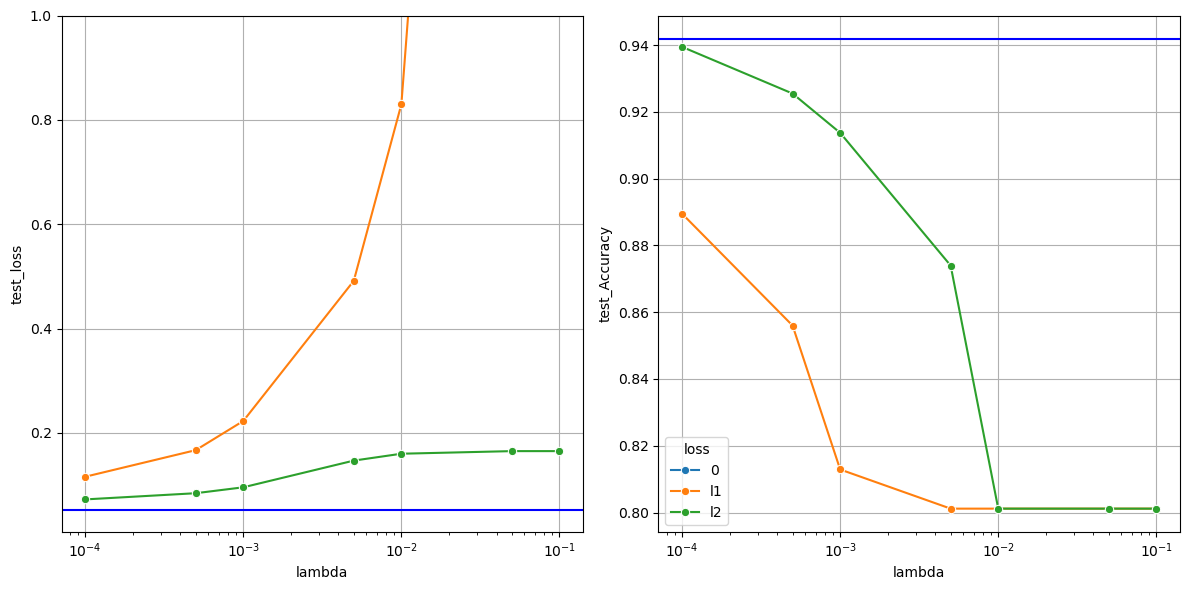

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=test_l1_l2, y='test_loss', x='lambda',     marker='o',   hue='loss' , ax=ax[0], legend=False) 
sns.lineplot(data=test_l1_l2, y='test_Accuracy', x='lambda', marker='o',   hue='loss' ,  ax=ax[1]) 
fold0_loss = test_l1_l2[test_l1_l2['loss'] == '0']['test_loss'].item()
fold0_acc = test_l1_l2[test_l1_l2['loss'] == '0']['test_Accuracy'].item()
ax[0].axhline(y=fold0_loss, color='blue', linestyle='-')
ax[1].axhline(y=fold0_acc, color='blue', linestyle='-')
ax[1].legend(title='loss')
for a in ax: a.grid('minor')
for a in ax: a.set_xscale('log')
ax[0].set_ylim([0.01, 1])
fig.tight_layout()
